# Word Embeddings

Bilgisayarların kelimeleri anlamaları için onları sayılara dönüştürürüz.

Bir sözlükte 10000 kelimenin olduğunu varsayalım.
Bu kelimelere 1 den başlayarak sayı verelim.
Varsayalım ki The sözcüğü 8989. kelime
King sözcüğü 3456. kelime
is sözcüğü 1010. kelime
Royal sözcüğü 2345. kelime
Bunları One-hot encoding formuna dönüştürmek istersek şöyle bir şey oluşur.

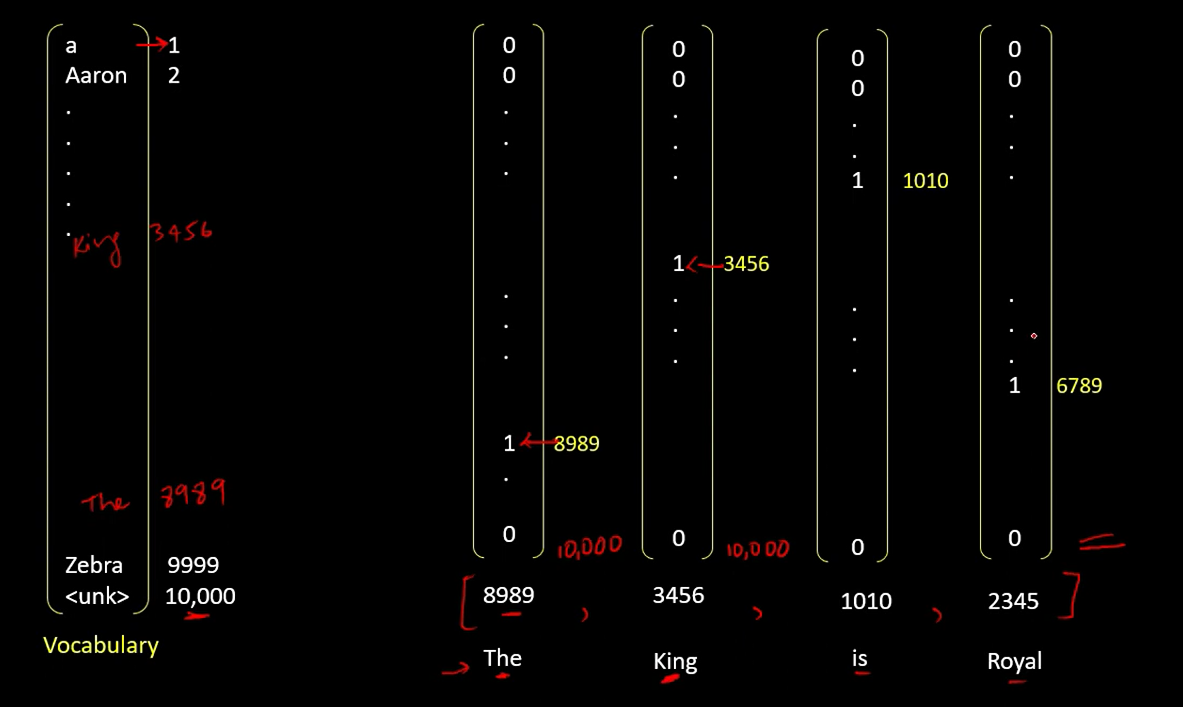

# Limitation of one-hot encoding
## 1- No relationship between the words.
İki kelime birbiri ile ilişkili ise bu gösterimden bunu anlayamayız.

For example

She is a King of the country.
Bu cümlede model she yerine he koyabilir.
she is a Prince of the country. Bu cümledeki prince kelimesini model görmediği için she için bir değişiklik yapamaz.

## 2- Computationally Ineficient.
Bu gösterimde her bir kelime için sadece 1 değerin 1 olduğu 10000 kelimeden oluşan 10000 matrix bulunmaktadır.

# Featurized Representation - Word Embeddings

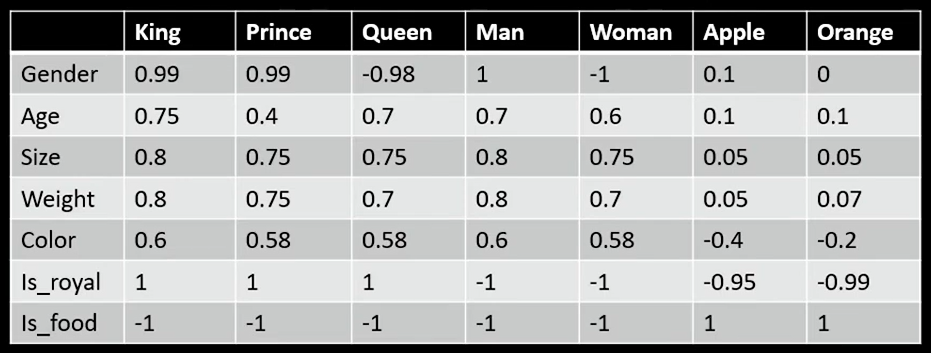





 Man - Woman : King - Queen
 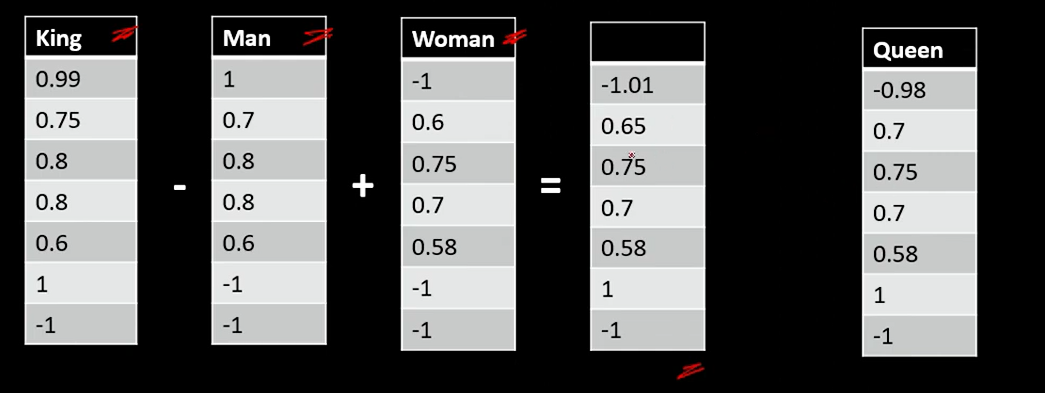



#  Training Word Embeddings
### a) Word2Vec
### b) GloVe


## Word2Vec

Word2Vec modeli eğitmede neuaral network model kullnılır.

### 1- Fake Problem / Dummy Problem

### 2- Extract Weight

Öncelikle bir Corpus dataya ihtiyacımız var
Corpus temel anlamda  metinlerin toplanmış halidir.


-- Corpus -- \
The future king is the prince.

Daughter is the princess.

Son is the prince.

Only a man can be a king.

Only a woman can be a queen.

The prince is a strong man.

The princess is a beautiful woman.

Prince is only a boy now.

Prince will be king.

A boy will  be a man.


Dummy problemini çözmek için kelimeleri ikili olarak alıyoruz bunlardan biri kaynak diğeri hedefi temsil ediyor.

future king future  future -> source king -> target

#### Removing Stopwords
stopwords cümlelerde sıklıkla kullanılan kelimelere anlam katmayan kelimelerdir.

future king prince

Daughter princess

Son prince

man king

woman queen

princess queen

prince strong man

princess beautiful woman

prince only boy

prince king

boy man

### Biagram

the quick brown fox jumps over ..
the quick, quick brown ,brown fox, fox jumps, jumps over, ...


in biagrams first word as input, and second word as output.

future,king future -> input king -> output


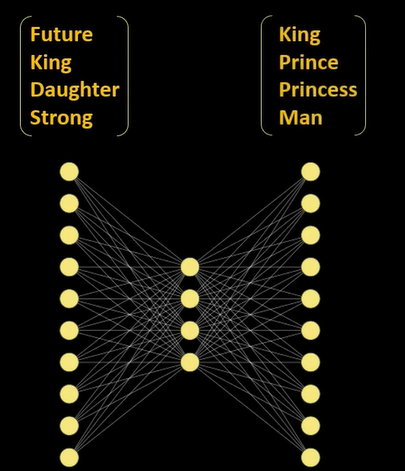




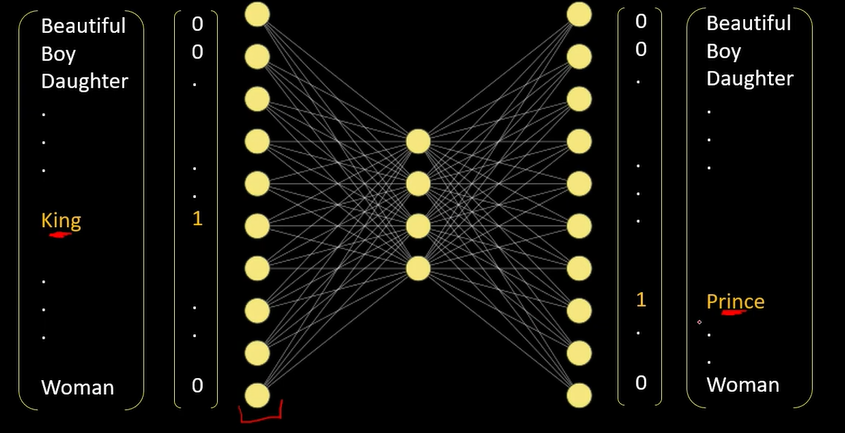



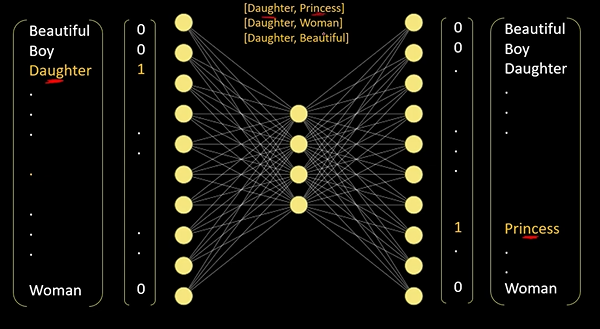

Bu modelde daughter kelimesine karşılık birden fazla output oluşabilir bundan dolayı modelin kesinliği düşüktür.


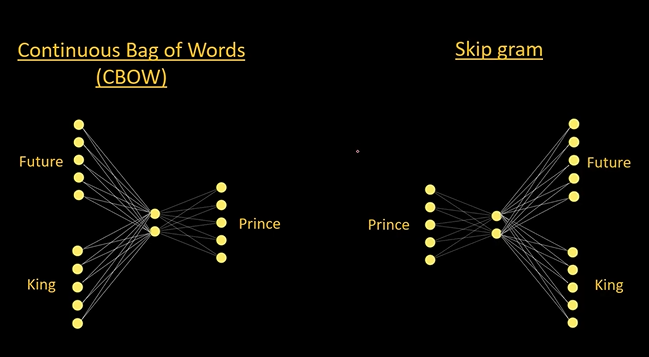

In [20]:
# Load Data
file = open("Royal_data.txt","r")
royal_data = file.readlines()
file.close()
print(royal_data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [21]:
#Lowercase
for i in range(len(royal_data)):
  royal_data[i] =royal_data[i].lower().replace("\n","")
print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


In [22]:
# Remove Stopwords and tokenization

stopwords = ["the", "is", "are","can","will","be","a","only","their","now","and","it","at"]

filtered_data = []


for sent in royal_data:
  temp = [] #storing word after removing stopword
  for word in sent.split():
    if word not in stopwords:
      temp.append(word)
  filtered_data.append(temp)

print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


In [23]:
len(filtered_data)

11

In [24]:
# Creating Biagrams
biagrams = []

for words_list in filtered_data:
  for i in range(len(words_list) -1):
    for j in range(i+1,len(words_list)):
      biagrams.append([words_list[i],word_list[j]])
      biagrams.append([words_list[j],word_list[i]])

print(biagrams)


[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'king'], ['princess', 'future'], ['son', 'king'], ['prince', 'future'], ['man', 'king'], ['king', 'future'], ['woman', 'king'], ['queen', 'future'], ['princess', 'king'], ['queen', 'future'], ['prince', 'king'], ['strong', 'future'], ['prince', 'prince'], ['man', 'future'], ['strong', 'prince'], ['man', 'king'], ['princess', 'king'], ['beautiful', 'future'], ['princess', 'prince'], ['woman', 'future'], ['beautiful', 'prince'], ['woman', 'king'], ['prince', 'king'], ['boy', 'future'], ['prince', 'king'], ['king', 'future'], ['boy', 'king'], ['man', 'future']]


In [28]:
# Vocabulary
all_words = []
for sent in filtered_data:
  all_words.extend(sent)

all_words = list(set(all_words))
all_words.sort()
print(all_words)

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']


In [29]:
len(all_words)

12

In [30]:
len(all_words)

12

In [31]:
# One Hot Encoding
words_dict = {}

counter = 0
for word in all_words:
  words_dict[word]  = counter
  counter +=1

words_dict

{'beautiful': 0,
 'boy': 1,
 'daughter': 2,
 'future': 3,
 'king': 4,
 'man': 5,
 'prince': 6,
 'princess': 7,
 'queen': 8,
 'son': 9,
 'strong': 10,
 'woman': 11}

In [32]:
import numpy as np

onehot_data = np.zeros((len(all_words),len(all_words)))


for i in range(len(all_words)):
  onehot_data[i][i] = 1


print(onehot_data)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [34]:
onehot_dict = {}

for i in range(len(all_words)):
  onehot_dict[all_words[i]] = onehot_data[i]

for word in onehot_dict:
  print(word,":",onehot_dict[word])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [38]:
X = []
Y = []

for bi in biagrams:
  X.append(onehot_dict[bi[0]])
  Y.append(onehot_dict[bi[1]])
x = np.array(X)
y = np.array(Y)


In [40]:
# Model
from keras.models import Sequential
from keras.layers import Dense,Input

model = Sequential()

vocal_size = len(onehot_data[0])
embedsize = 2
# can be more one hundered size
model.add(Input(shape = (12,)))
model.add(Dense(2,activation = "linear"))
model.add(Dense(vocal_size,activation = "softmax"))



model.compile(loss = "categorical_crossentropy",optimizer = "adam")



In [41]:
model.fit(x,y,epochs = 1000)

Epoch 1/1000
2/2 [==============================] - 2s 22ms/step - loss: 2.5119
Epoch 2/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.5074
Epoch 3/1000
2/2 [==============================] - 0s 11ms/step - loss: 2.5033
Epoch 4/1000
2/2 [==============================] - 0s 9ms/step - loss: 2.4994
Epoch 5/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.4955
Epoch 6/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.4915
Epoch 7/1000
2/2 [==============================] - 0s 7ms/step - loss: 2.4877
Epoch 8/1000
2/2 [==============================] - 0s 8ms/step - loss: 2.4838
Epoch 9/1000
2/2 [==============================] - 0s 10ms/step - loss: 2.4801
Epoch 10/1000
2/2 [==============================] - 0s 10ms/step - loss: 2.4763
Epoch 11/1000
2/2 [==============================] - 0s 10ms/step - loss: 2.4726
Epoch 12/1000
2/2 [==============================] - 0s 7ms/step - loss: 2.4690
Epoch 13/1000
2/2 [========================

In [47]:
weights = model.get_weights()[0]


weights

array([[ 0.15082218, -0.32802093],
       [ 0.7212206 , -0.16009936],
       [ 0.08589813,  1.2124543 ],
       [-0.06311148,  0.89884377],
       [ 1.0182381 , -0.9594944 ],
       [ 0.5637811 , -0.10483606],
       [ 0.7282858 ,  0.20892376],
       [ 0.2086851 ,  0.38825786],
       [ 0.3189359 , -1.3508748 ],
       [ 0.04759918,  0.98652214],
       [ 0.53563356, -0.0788819 ],
       [ 0.47047594,  0.14419301]], dtype=float32)

In [49]:
word_embeddings = {}

for word in all_words:
  word_embeddings[word] = weights[words_dict[word]]

for word in all_words:
  print(word,":",word_embeddings[word])

beautiful : [ 0.15082218 -0.32802093]
boy : [ 0.7212206  -0.16009936]
daughter : [0.08589813 1.2124543 ]
future : [-0.06311148  0.89884377]
king : [ 1.0182381 -0.9594944]
man : [ 0.5637811  -0.10483606]
prince : [0.7282858  0.20892376]
princess : [0.2086851  0.38825786]
queen : [ 0.3189359 -1.3508748]
son : [0.04759918 0.98652214]
strong : [ 0.53563356 -0.0788819 ]
woman : [0.47047594 0.14419301]


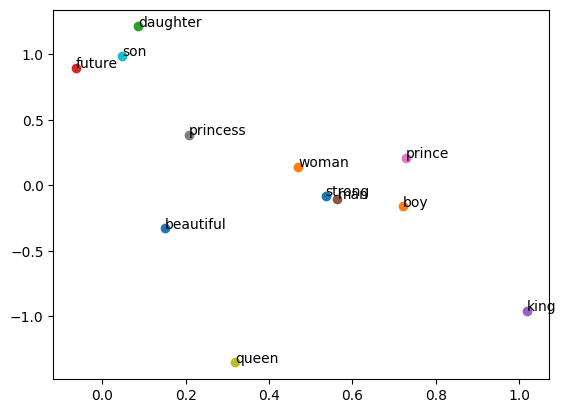

In [50]:
import matplotlib.pyplot as plt

for word in all_words:
  coordinates = word_embeddings[word]
  plt.scatter(coordinates[0],coordinates[1]) #[ 0.15082218 -0.32802093]
  plt.annotate(word,(coordinates[0],coordinates[1]))

# Sources
Word Embedding Python | RNN | Detailed Explanation ->
https://www.youtube.com/watch?v=pFOKxJO4gu8


Part 1 | Training Word Embeddings | Word2Vec ->
https://www.youtube.com/watch?v=MYjQV5jwqCY

Part 2 | Python | Training Word Embeddings | Word2Vec | ->
https://www.youtube.com/watch?v=39w4WSxvRQM&t=1213s&ab_channel=CodingLane